In [ ]:
import numpy as np
import matplotlib.pyplot as plt

%config InlineBackend.figure_format='retina'

# Time series

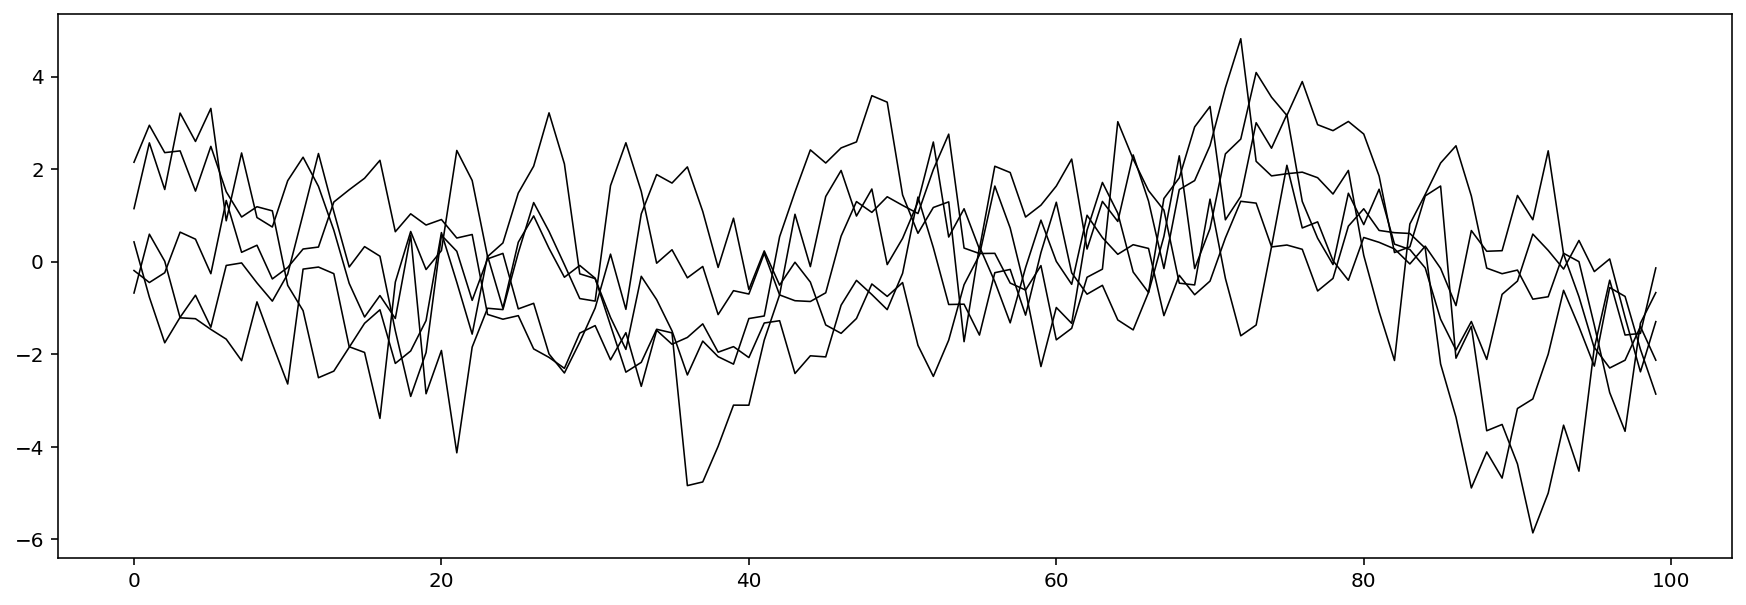

In [ ]:
def draw_trajectory_1(N, alpha, beta):
  x = np.random.randn()
  trajectory = np.zeros(N)
  trajectory[0] = x
  for i in range(1, N):
    trajectory[i] = alpha * trajectory[i-1] + np.random.normal(0, 1) + beta
  return trajectory

plt.figure(figsize=(15, 5))
for _ in range(5):
  plt.plot(draw_trajectory_1(100, 0.8, 0.0), color="black", linewidth=0.8)

\begin{equation}
  \begin{split}
  &z_1, \dots, z_N \sim z(t_1), \dots, z(t_N)\\
  &t_1 = h,\dots t_N = Nh
  \end{split}
\end{equation}

## Types of time series

+ Stationary

\begin{equation}
  p(z_1,\dots,z_{N}) = p(z_{i+1},\dots,z_{i+N})
\end{equation}



### Statistical properties of a bunch of time series

In [ ]:
A, B = [], []

for _ in range(1000):
  a, b = draw_trajectory_1(1000, 0.8, 0.0)[10], draw_trajectory_1(1000, 0.8, 0.0)[232]
  A.append(a)
  B.append(b)

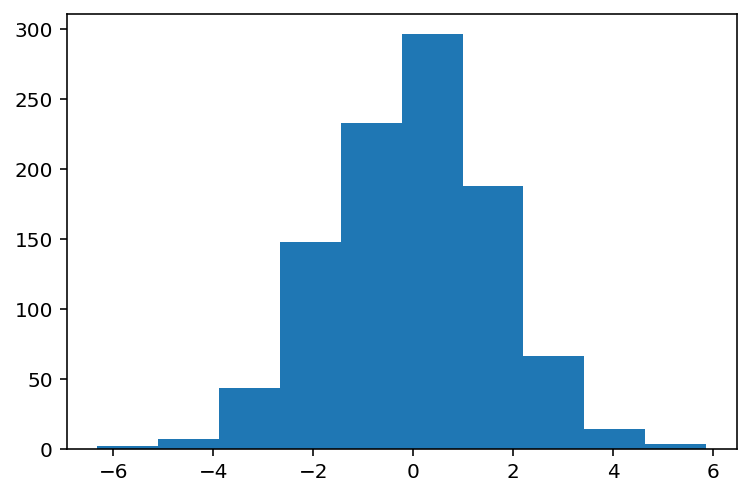

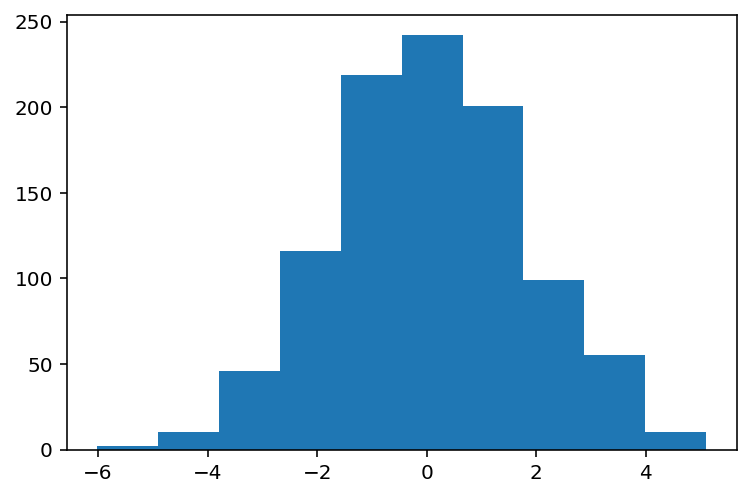

In [ ]:
plt.hist(A)
plt.figure()
plt.hist(B);

In [ ]:
Delta = []

for _ in range(10):
  A, B = [], []

  for _ in range(1000):
    a, b = draw_trajectory_1(11, 0.8, 0.0)[10], draw_trajectory_1(233, 0.8, 0.0)[232]
    A.append(a)
    B.append(b)

  delta = np.std(A) - np.std(B)
  Delta.append(delta)

In [ ]:
print(np.mean(Delta))

0.010891628510493367


In [ ]:
Delta = []

for _ in range(10):
  A, B = [], []

  for _ in range(10000):
    a, b = draw_trajectory_1(11, 0.8, 0.0)[10], draw_trajectory_1(233, 0.8, 0.0)[232]
    A.append(a)
    B.append(b)

  delta = np.std(A) - np.std(B)
  Delta.append(delta)

In [ ]:
print(np.mean(Delta))

-0.005971358045293873


### Statistical properties of a single time series

In [ ]:
n = np.linspace(0, 500000, 500000, dtype=int)[::10]
large_trajectory = draw_trajectory_1(500000, 0.8, 0.0)

X = []

for i, j in zip(n[:-1], n[1:]):
  x = np.mean(large_trajectory[i:j])
  X.append(x)

In [ ]:
n = np.linspace(0, 500000, 500000, dtype=int)[::10]
large_trajectory = draw_trajectory_1(500000, 0.8, 0.0)

Y = []

for i, j in zip(n[:-1], n[1:]):
  x = np.mean(large_trajectory[i:j])
  Y.append(x)

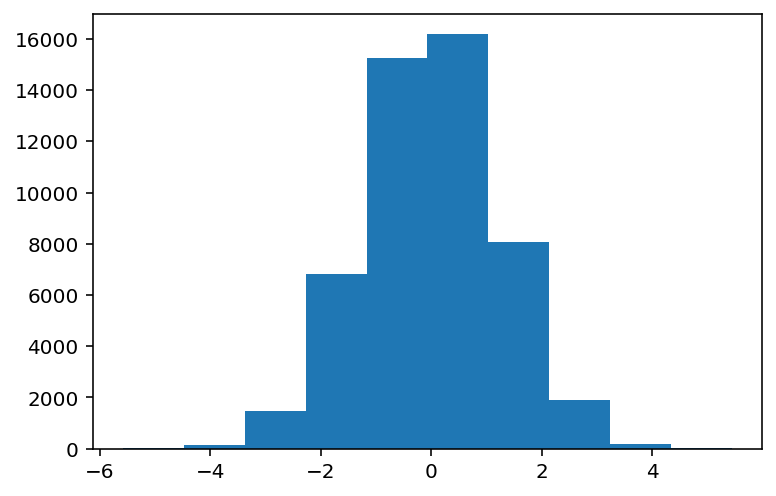

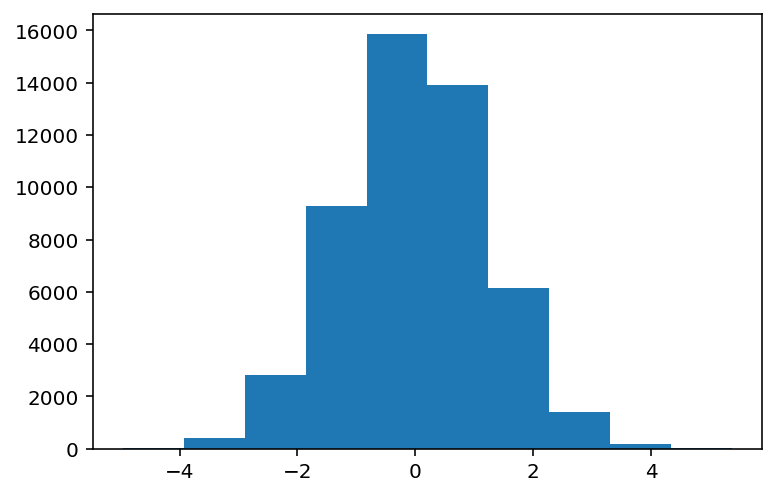

In [ ]:
plt.hist(X[:-1])
plt.figure()
plt.hist(Y[:-1]);

In [ ]:
print(np.mean(X[:-1]), np.mean(Y[:-1]))

0.007352356509913406 -0.003425622112737508


In [ ]:
print(np.std(X[:-1]), np.std(Y[:-1]))

1.228147239921321 1.2272988219211067


+ Non - stationary


\begin{equation}
  p(z_1,\dots,z_{N}) \neq p(z_{i+1},\dots,z_{i+N})
\end{equation}

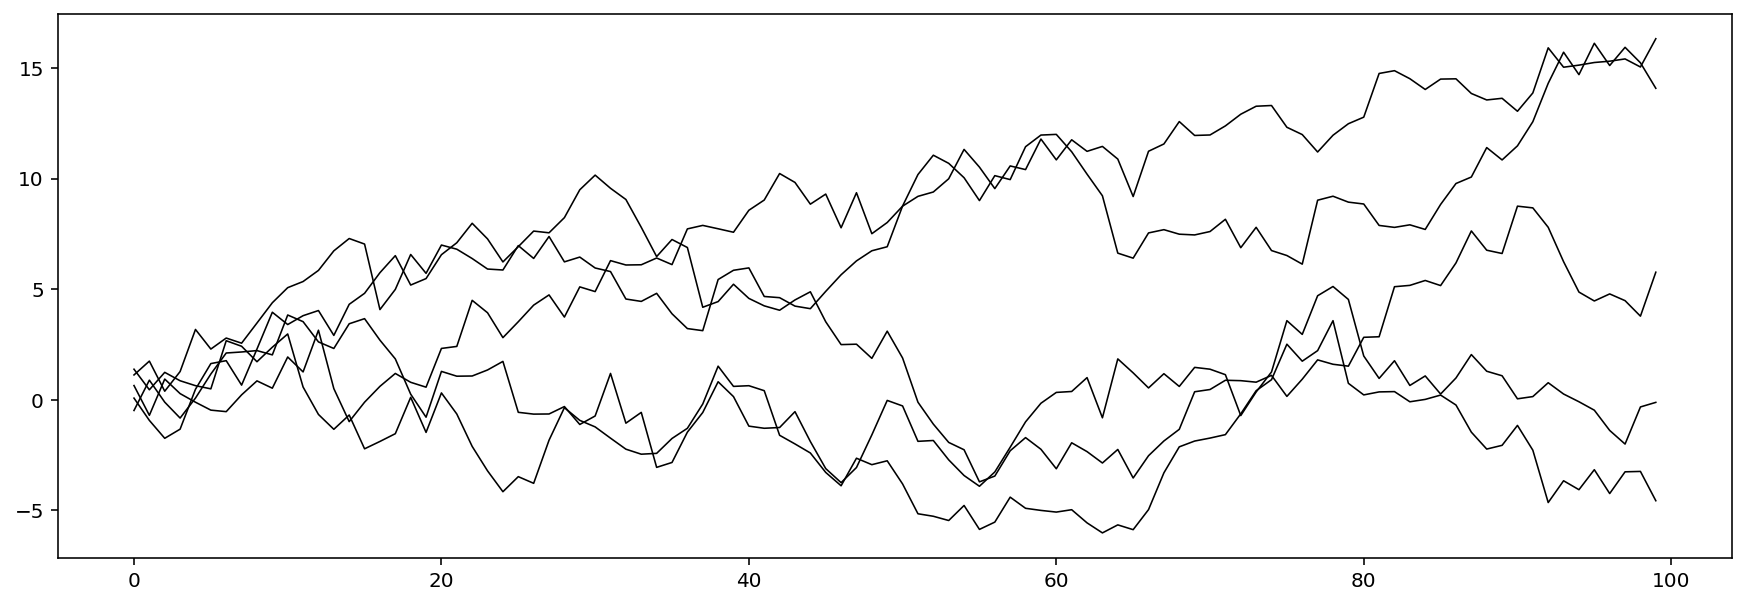

In [ ]:
plt.figure(figsize=(15, 5))
for _ in range(5):
  plt.plot(draw_trajectory_1(100, 1.0012, 0.0), color="black", linewidth=0.8)

In [ ]:
A, B = [], []

for _ in range(1000):
  a, b = draw_trajectory_1(1000, 1.0012, 0.0)[23], draw_trajectory_1(1000, 1.0012, 0.0)[400]
  A.append(a)
  B.append(b)

In [ ]:
print(np.std(A), np.std(B))

4.891216136320309 26.46771605081239


In [ ]:
np.mean(A), np.mean(B)

(-0.13261845143839374, -1.5009828834585184)

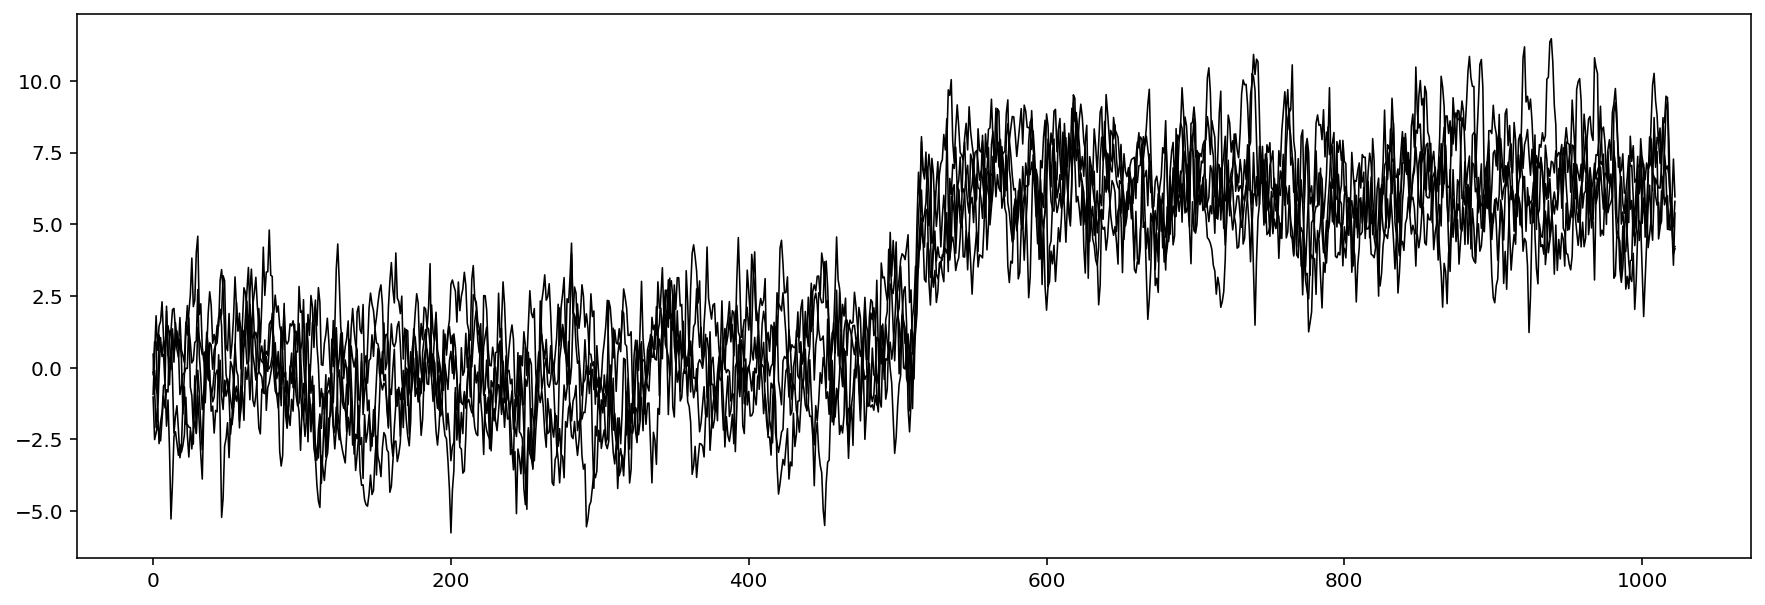

In [ ]:
def draw_trajectory_2(N, alpha):
  x = np.random.randn()
  trajectory = np.zeros(N)
  trajectory[0] = x
  for i in range(1, N):
    beta = 0 if i < N // 2 else 1.23
    trajectory[i] = alpha * trajectory[i-1] + np.random.normal(0, 1) + beta
  return trajectory

plt.figure(figsize=(15, 5))
for _ in range(5):
  plt.plot(draw_trajectory_2(1023, 0.8), color="black", linewidth=0.8)

**Digression**

How did we generate random numbers before numpy?

[Hand-crafted random difits (buy now)](https://www.amazon.com/Million-Random-Digits-Normal-Deviates/dp/0833030477/ref=sr_1_1?crid=NRY83L64QA0L&keywords=a+million+random+digits&qid=1576941420&sprefix=a+million+random+digits%2Caps%2C230&sr=8-1)

![random numbers](https://mathbitsnotebook.com/Algebra2/Statistics/random%20table.png)




+ Deterministic time series

In [ ]:
sigma, beta, rho, h = 10, 8/3, 28, 1e-3

N = int(1e4)

solution = np.zeros((N, 3))
solution[0, :] = [1, -1.2, 2]

for i in range(1, int(1e4)):
  solution[i, 0] = solution[i-1, 0] + sigma * (solution[i-1, 1] - solution[i-1, 0]) * h
  solution[i, 1] = solution[i-1, 0] * (rho - solution[i-1, 2]) * h + solution[i-1, 1]
  solution[i, 2] = (solution[i-1, 0] * solution[i-1, 1] - beta * solution[i-1, 2]) * h + solution[i-1, 2]

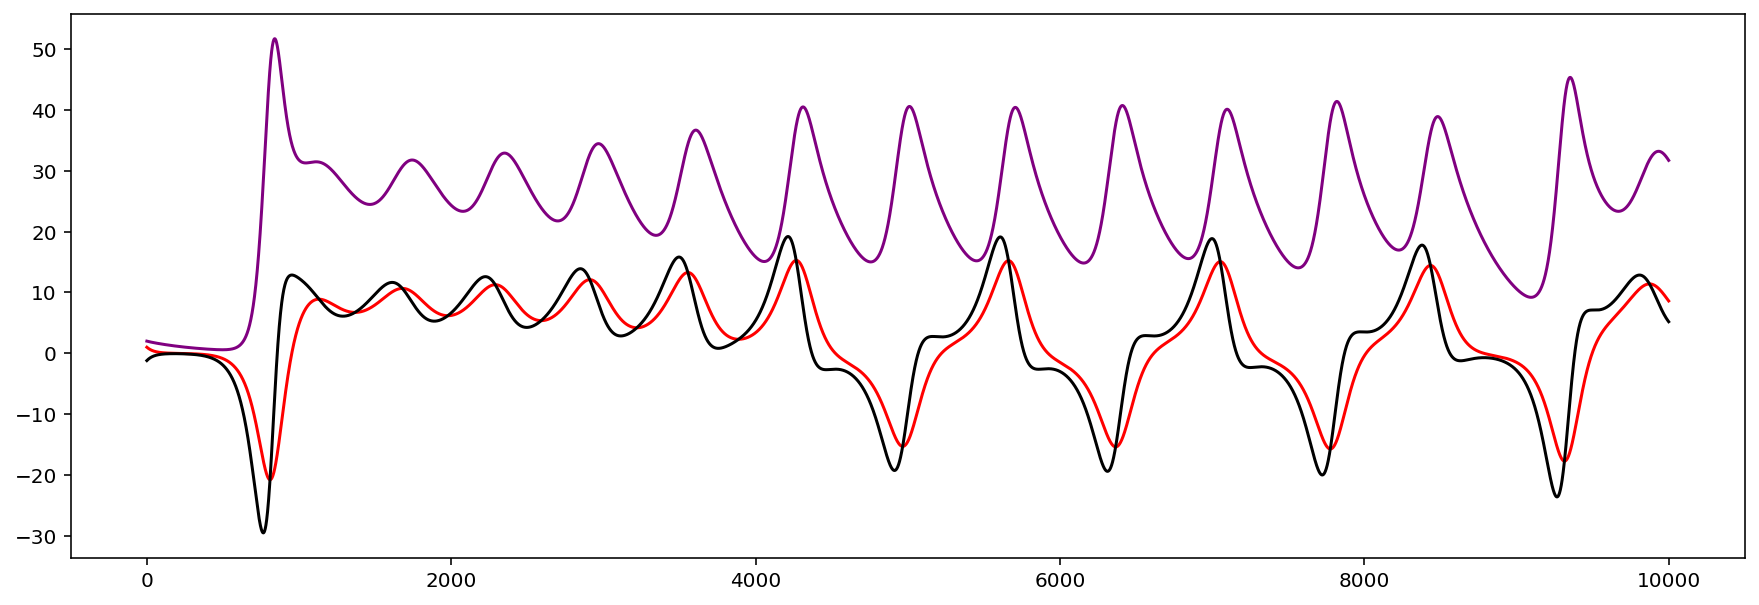

In [ ]:
plt.figure(figsize=(15, 5))
plt.plot(solution[:, 0], color="red")
plt.plot(solution[:, 1], color="black")
plt.plot(solution[:, 2], color="purple");

## Data for cryptocurrencies

In [ ]:
import pandas as pd

In [ ]:
bitcoin = pd.read_csv('BTC-USD.csv')
bitcoin.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2015-06-01,230.233002,231.712997,221.296005,222.925995,222.925995,26090500
1,2015-06-02,222.893997,226.416000,222.419006,225.802994,225.802994,20459000
2,2015-06-03,225.735992,227.404007,223.929993,225.873993,225.873993,17752400
3,2015-06-04,225.772003,226.580994,224.054001,224.324005,224.324005,14728100
4,2015-06-05,224.154007,225.968002,223.179001,224.951996,224.951996,18056500


In [ ]:
usdt = pd.read_csv('USDT-USD.csv')
usdt.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2017-11-09,1.01087,1.01327,0.996515,1.00818,1.00818,358188000
1,2017-11-10,1.00650,1.02423,0.995486,1.00601,1.00601,756446016
2,2017-11-11,1.00598,1.02621,0.995799,1.00899,1.00899,746227968
3,2017-11-12,1.00602,1.10591,0.967601,1.01247,1.01247,1466060032
4,2017-11-13,1.00448,1.02929,0.975103,1.00935,1.00935,767884032


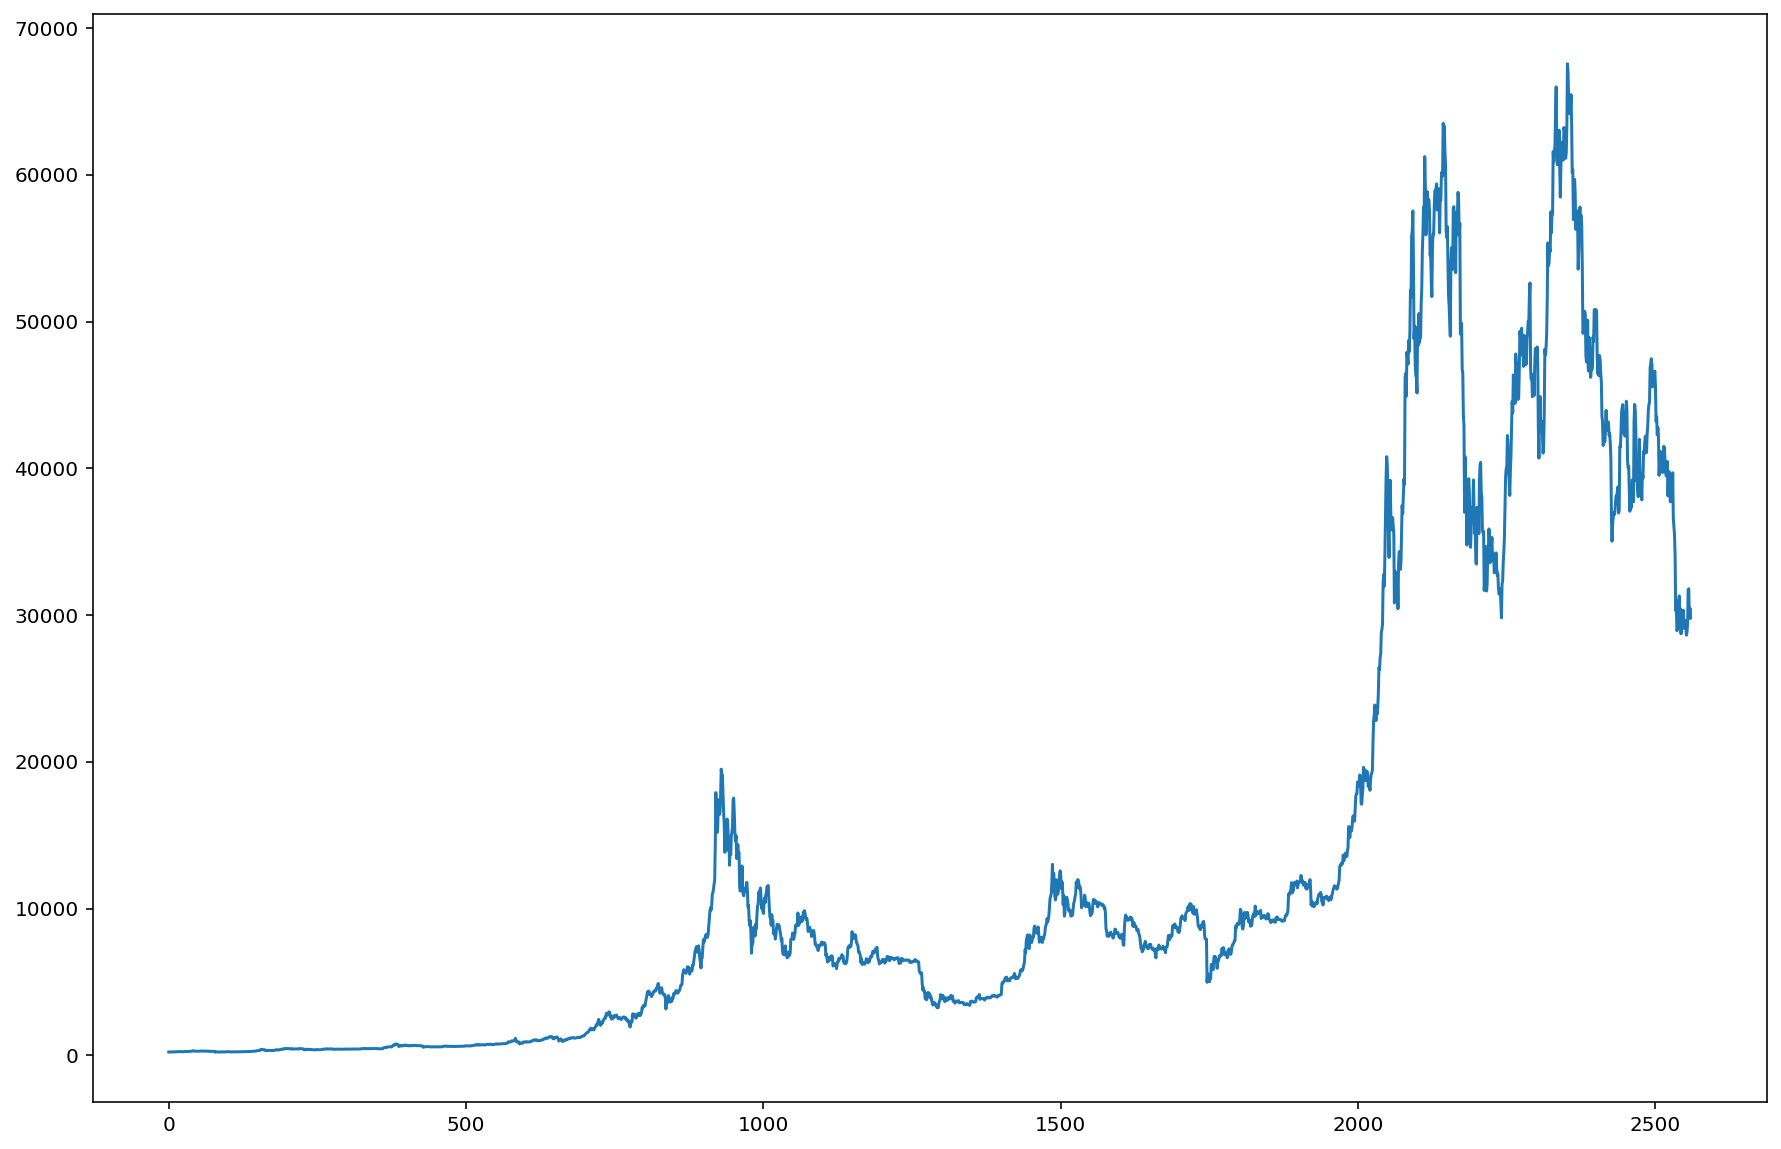

In [ ]:
plt.figure(figsize=(15, 10))
plt.plot(bitcoin.Close);

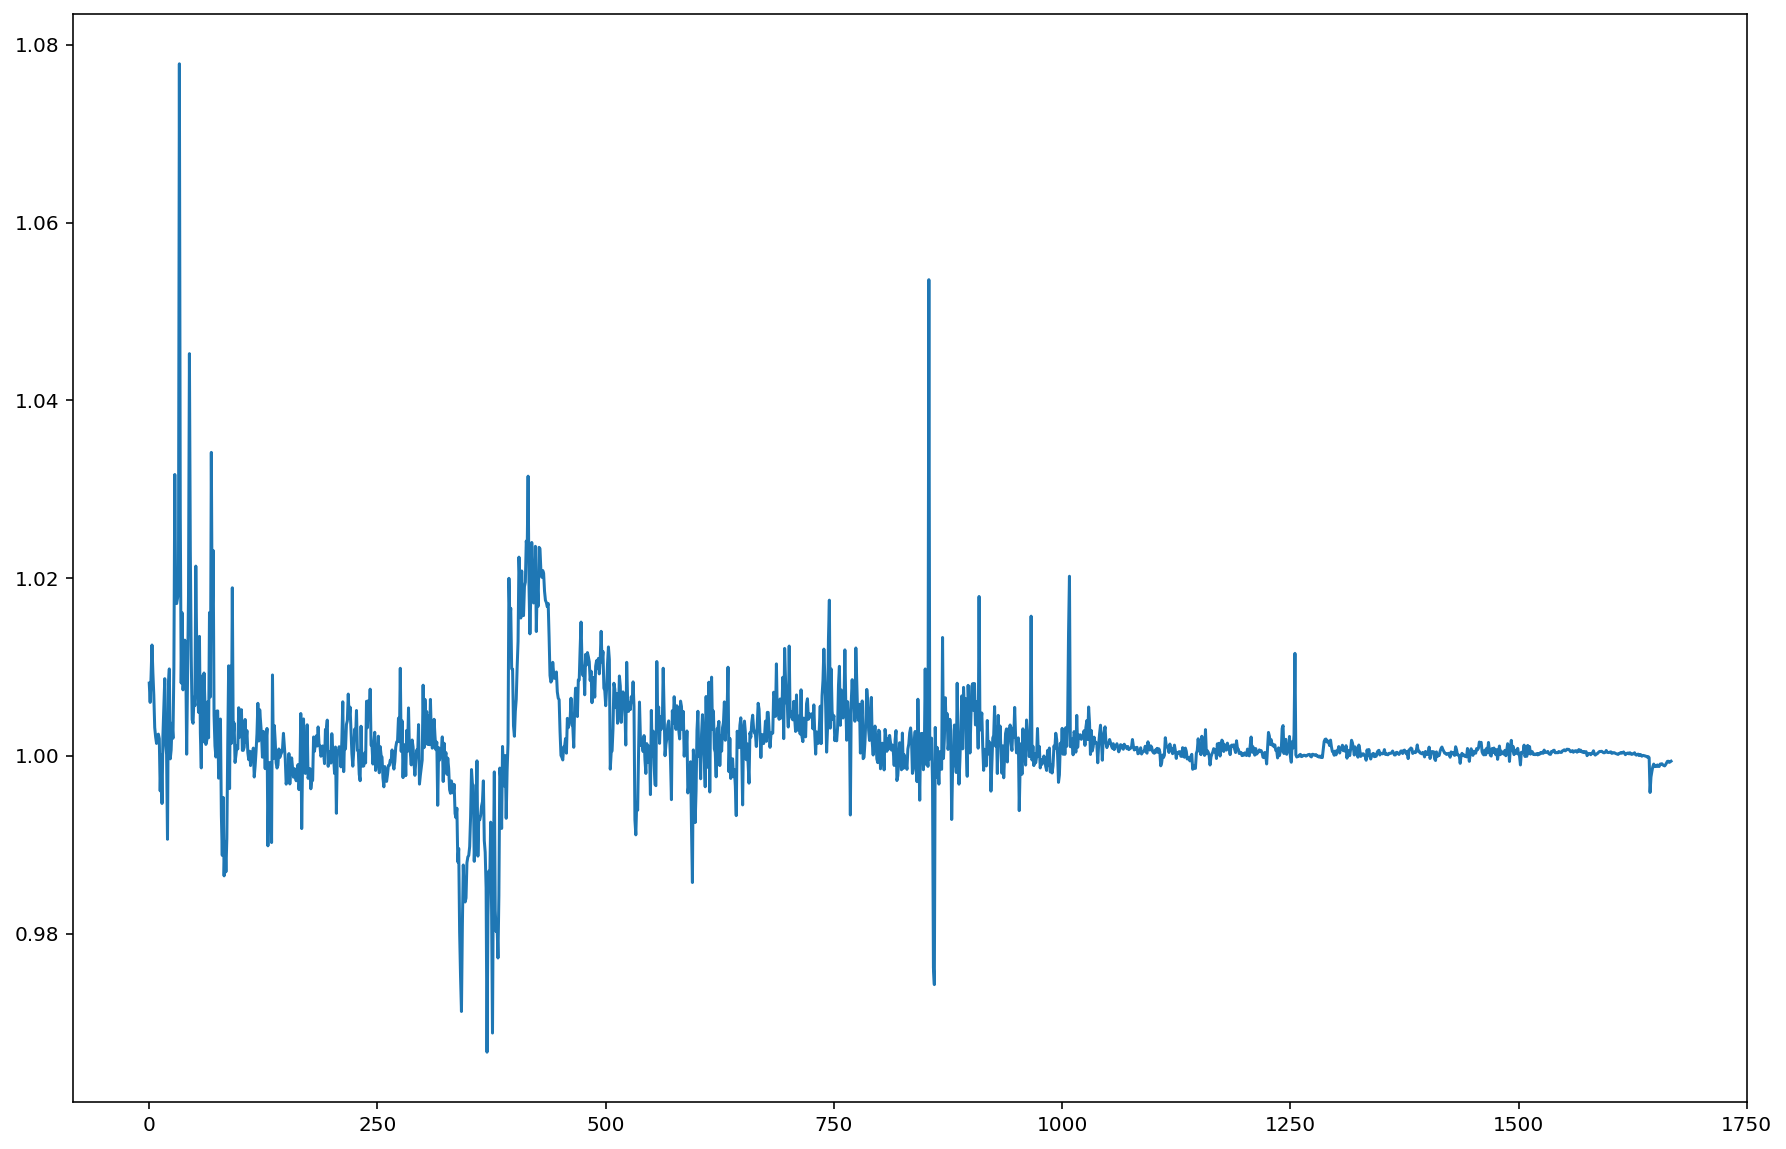

In [ ]:
plt.figure(figsize=(15, 10))
plt.plot(usdt.Close);

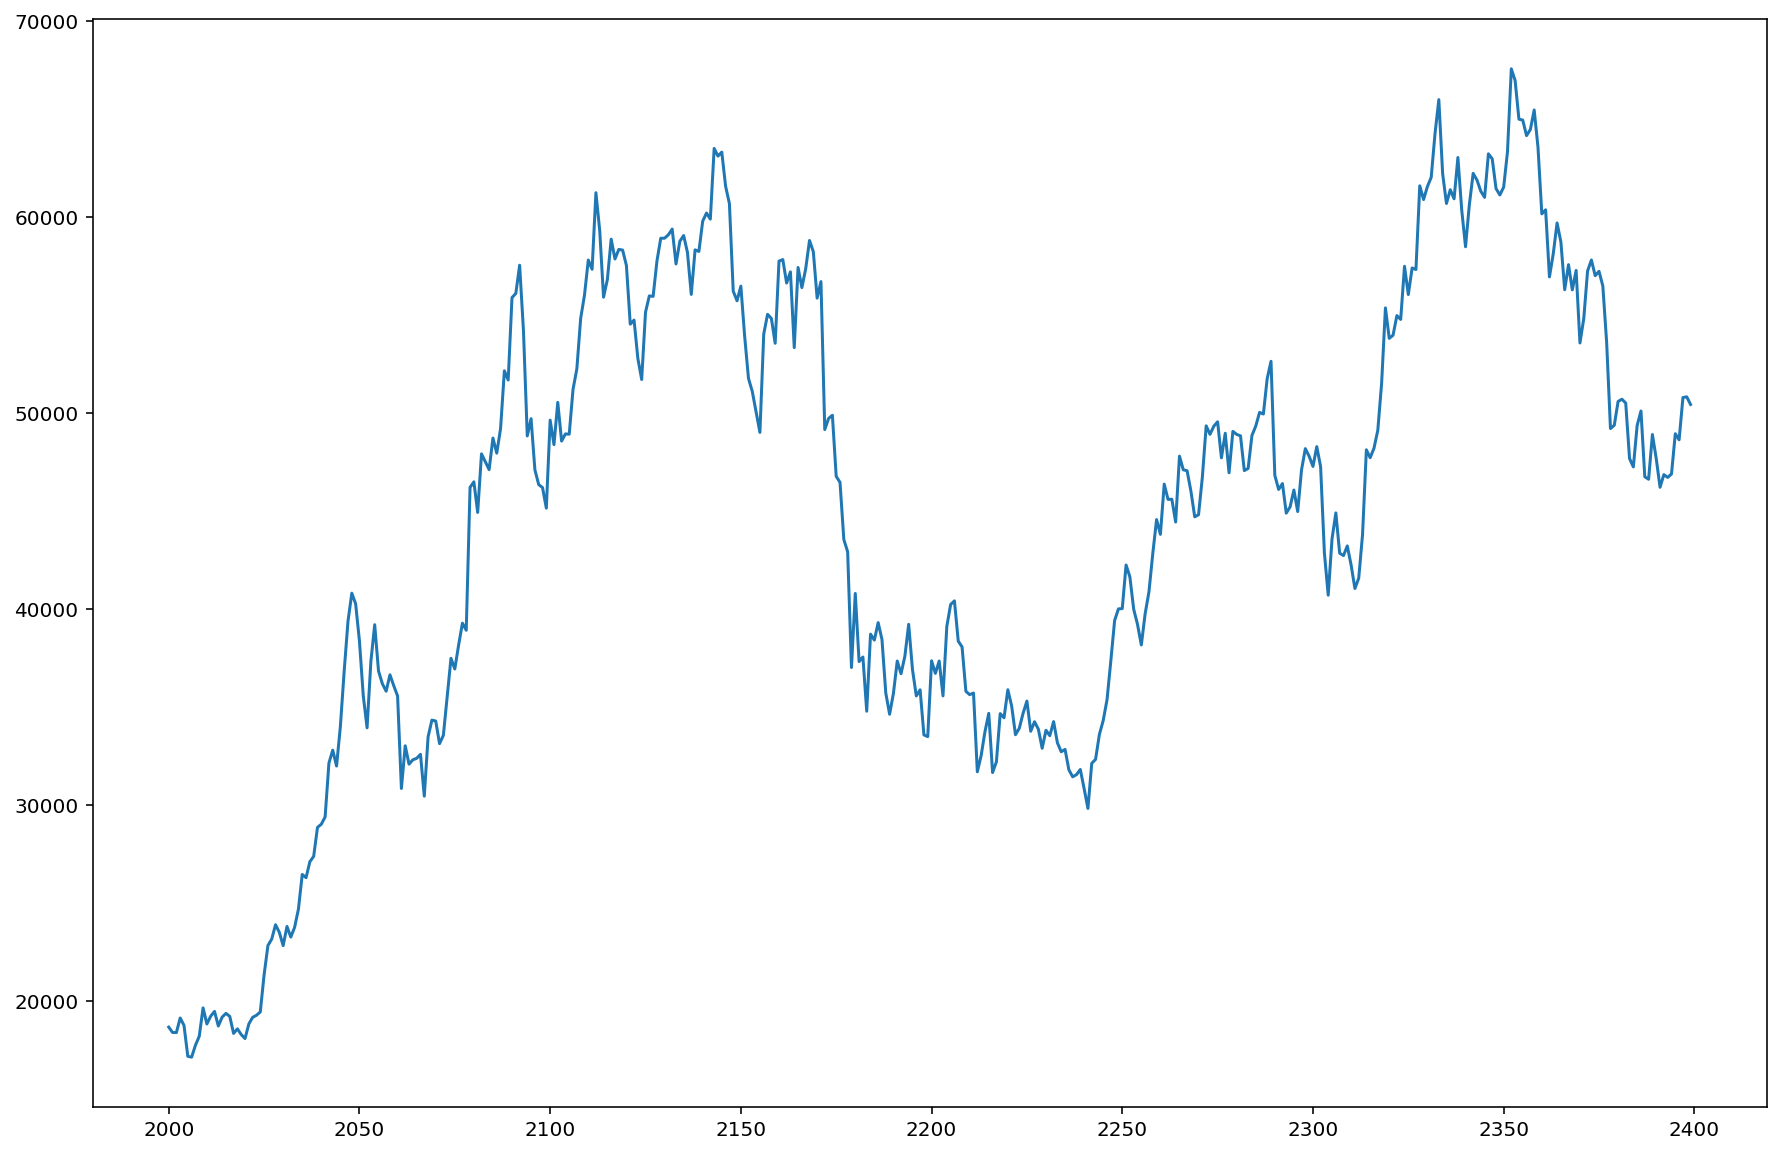

In [ ]:
plt.figure(figsize=(15, 10))
plt.plot(bitcoin.Close[2000:2400]);

## Keeling curve: trend and seasonality

In [ ]:
keeling = pd.read_csv('keeling_curve.csv')
keeling.head()

,Year,Month,Decimal Date,Carbon Dioxide (ppm),Seasonally Adjusted CO2 (ppm),Carbon Dioxide Fit (ppm),Seasonally Adjusted CO2 Fit (ppm)
0,1958,1,1958.0411,NaN,NaN,NaN,NaN
1,1958,2,1958.1260,NaN,NaN,NaN,NaN
2,1958,3,1958.2027,315.69,314.42,316.18,314.89
3,1958,4,1958.2877,317.45,315.15,317.30,314.98
4,1958,5,1958.3699,317.50,314.73,317.83,315.06


In [ ]:
keeling.columns

Index(['Year', 'Month', 'Decimal Date', 'Carbon Dioxide (ppm)',
       'Seasonally Adjusted CO2 (ppm)', 'Carbon Dioxide Fit (ppm)',
       'Seasonally Adjusted CO2 Fit (ppm)'],
      dtype='object')

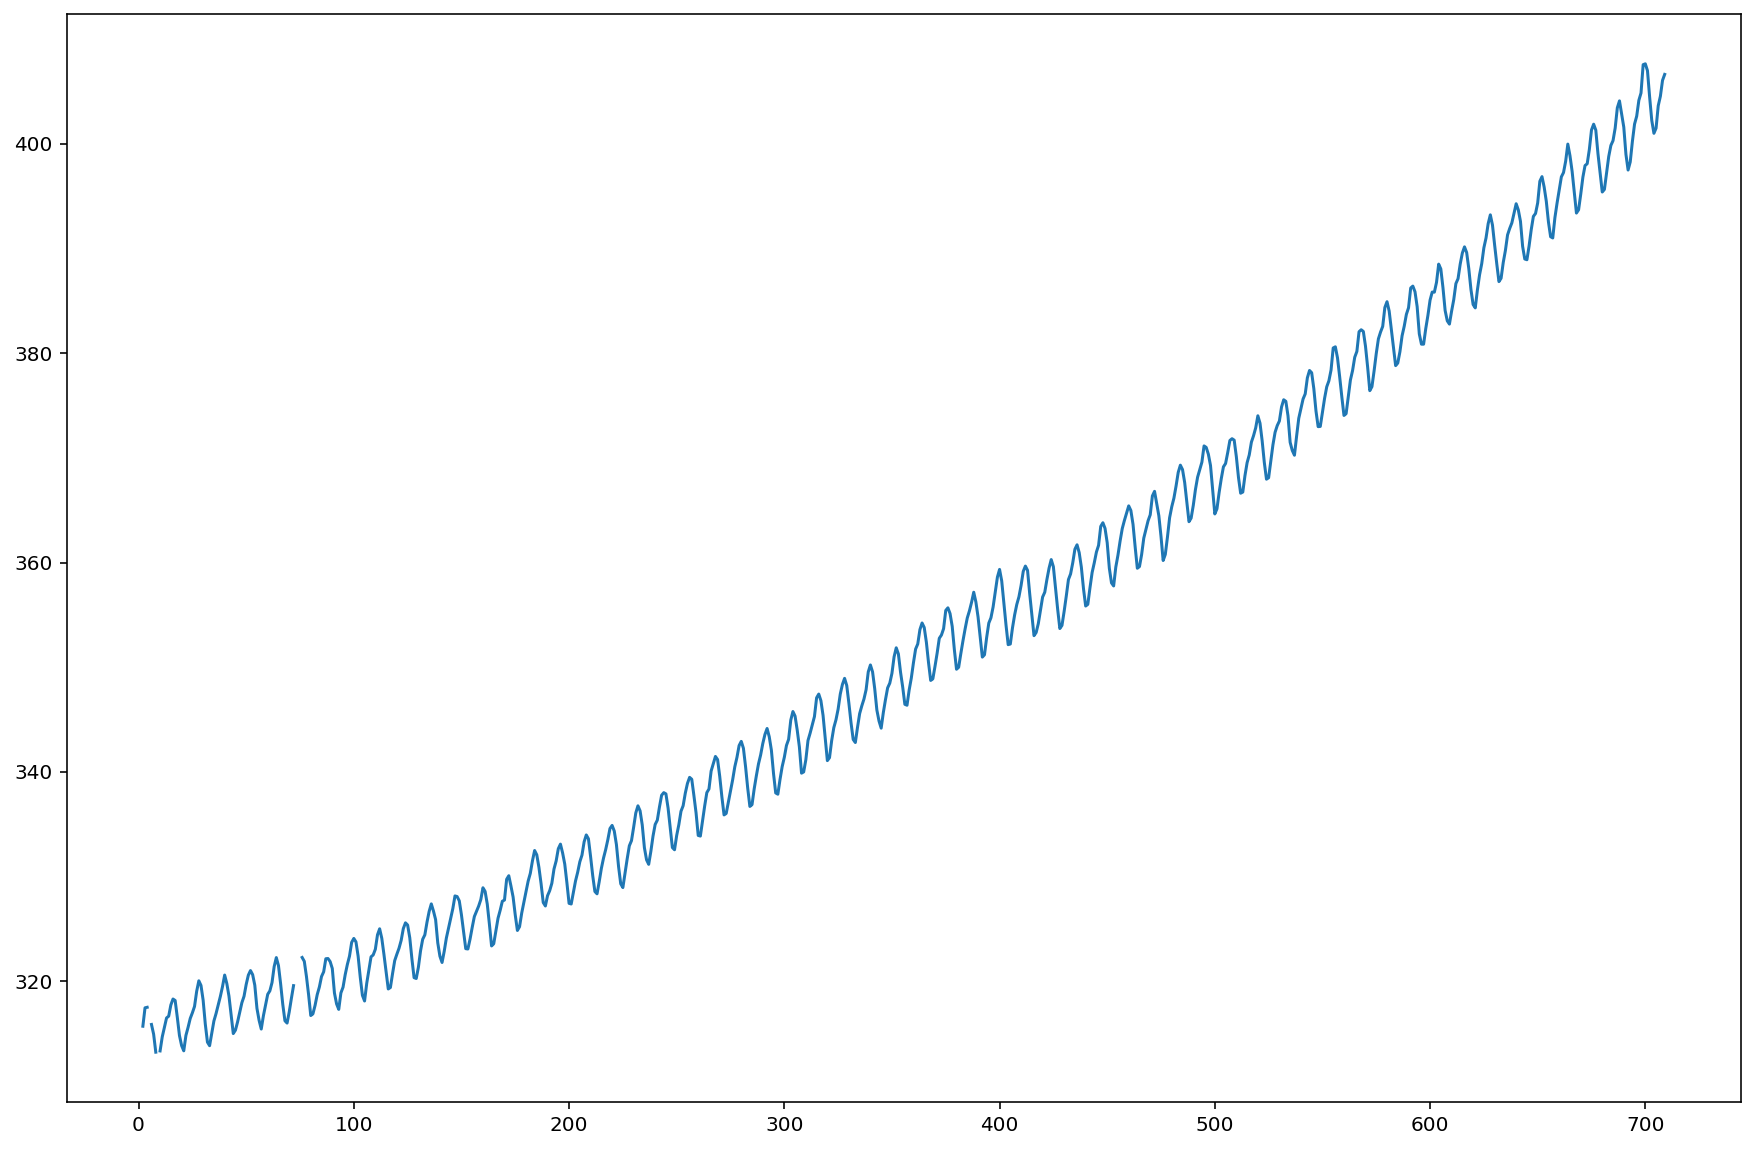

In [ ]:
plt.figure(figsize=(15, 10))
plt.plot(keeling['Carbon Dioxide (ppm)']);

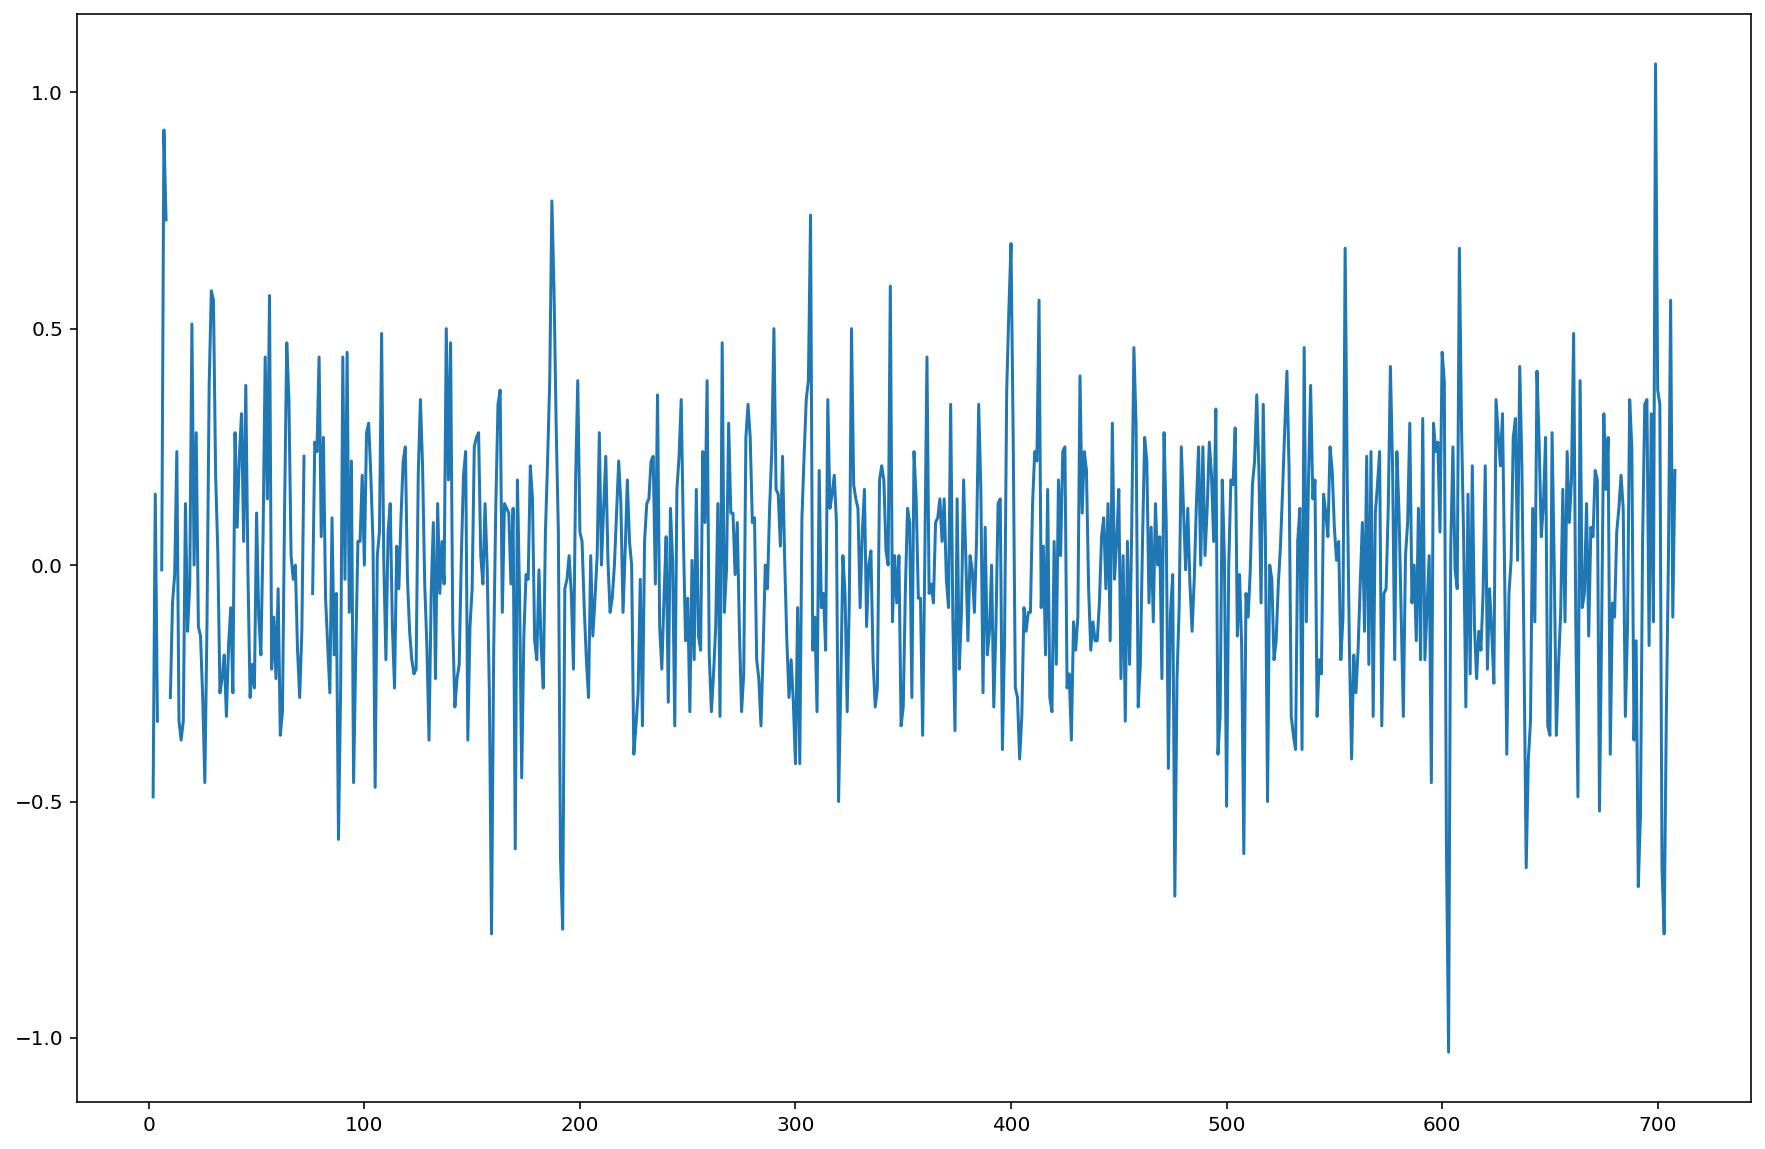

In [ ]:
plt.figure(figsize=(15, 10))
plt.plot(keeling['Carbon Dioxide (ppm)'] - keeling['Carbon Dioxide Fit (ppm)']);

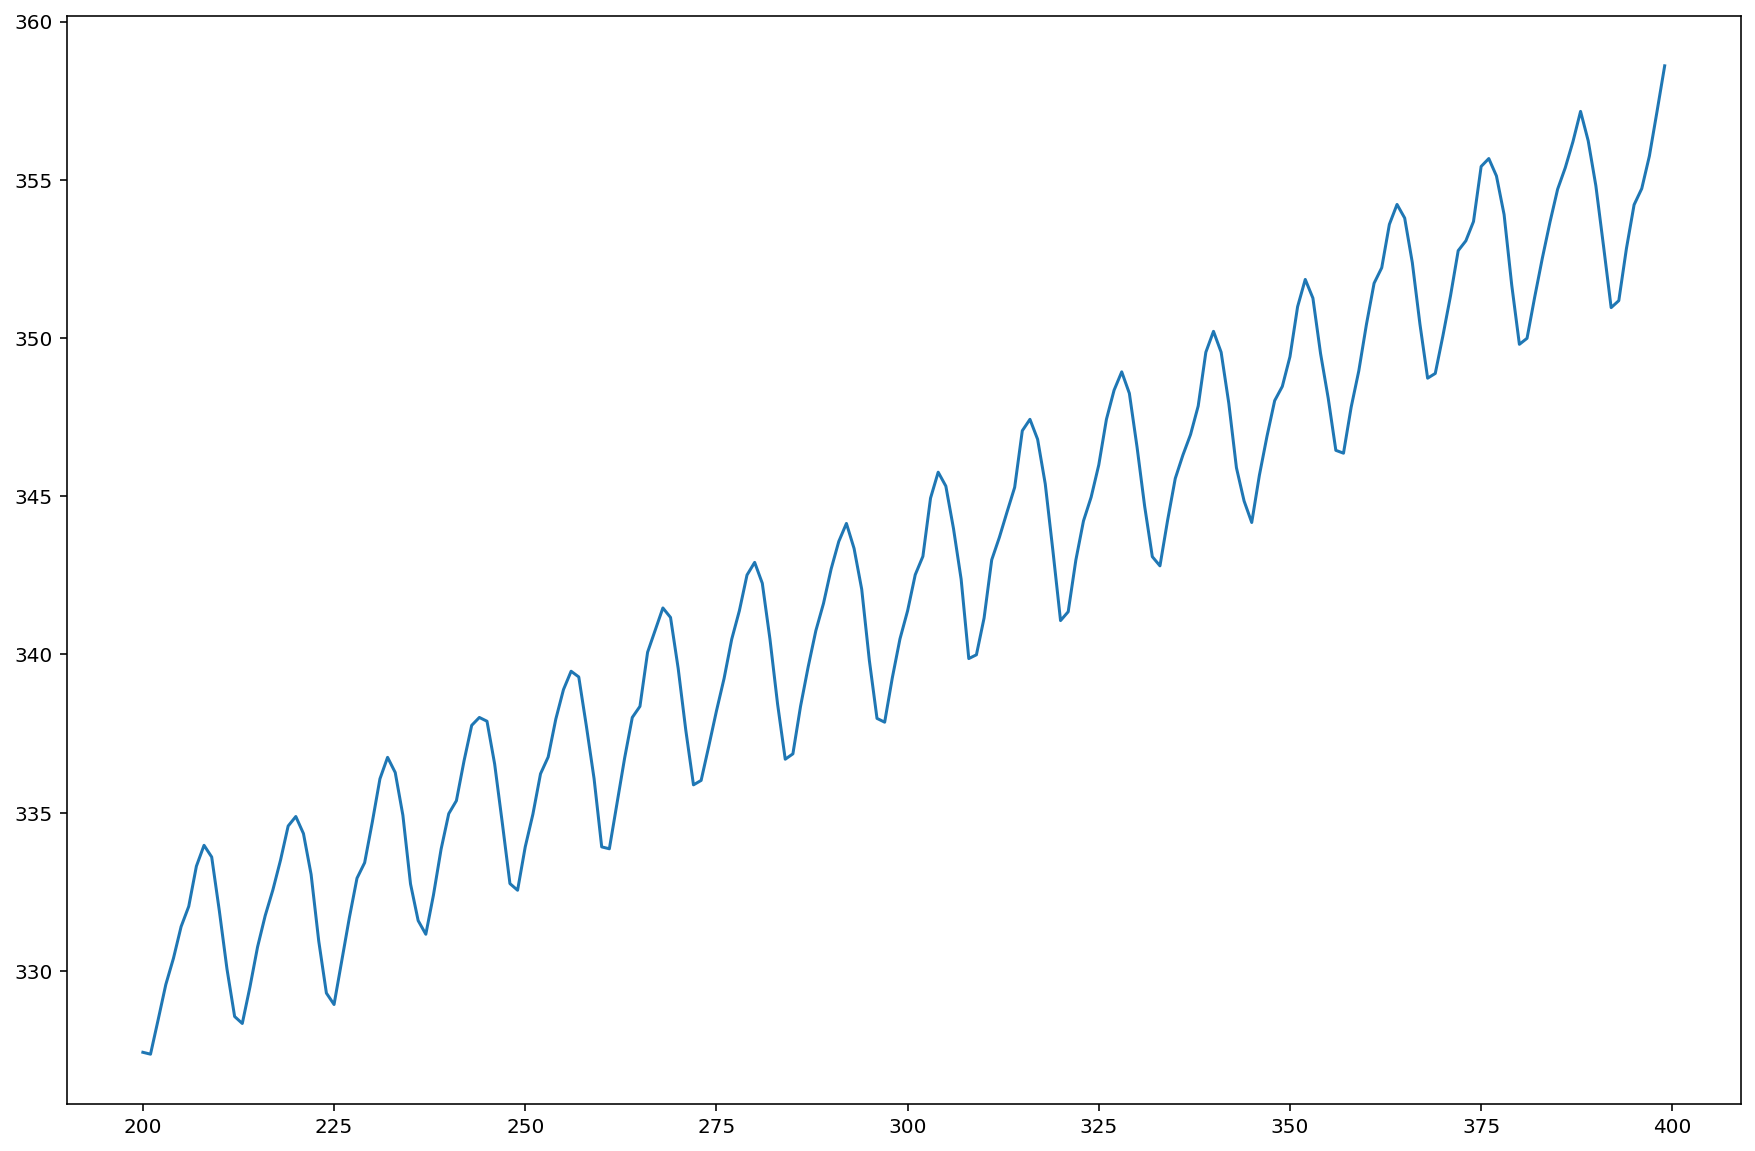

In [ ]:
plt.figure(figsize=(15, 10))
plt.plot(keeling['Carbon Dioxide (ppm)'][200:400]);

In [ ]:
t = np.array(keeling['Carbon Dioxide (ppm)'][200:400])
alpha = 2*np.pi/25

a1 = np.ones(len(t))
a2 = np.arange(len(t))
a3 = np.sin(2*np.pi*a2/12 + 10)

A = np.vstack([a1, a2, a3]).T

M = A.T @ A
T = A.T @ t

beta = np.linalg.inv(M) @ T
predictions = A @ beta

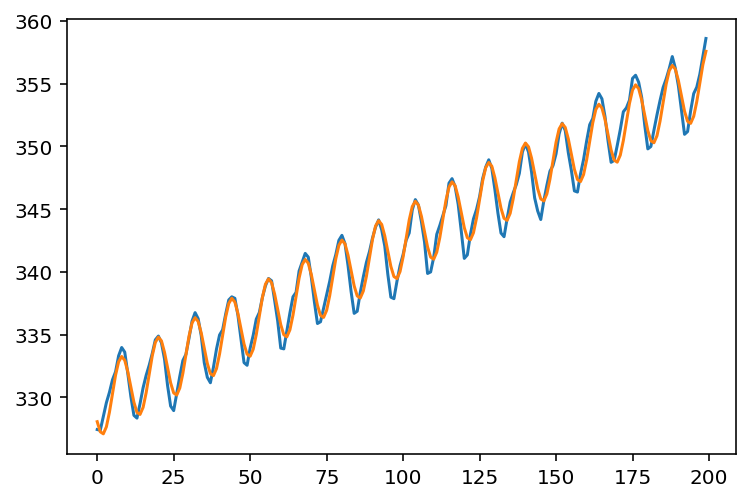

In [ ]:
plt.plot(a2, t)
plt.plot(a2, predictions);

In [ ]:
beta

array([ 3.29437383e+02,  1.29476050e-01, -1.06861493e-01])

## Dickey-Fuller test, stationarity

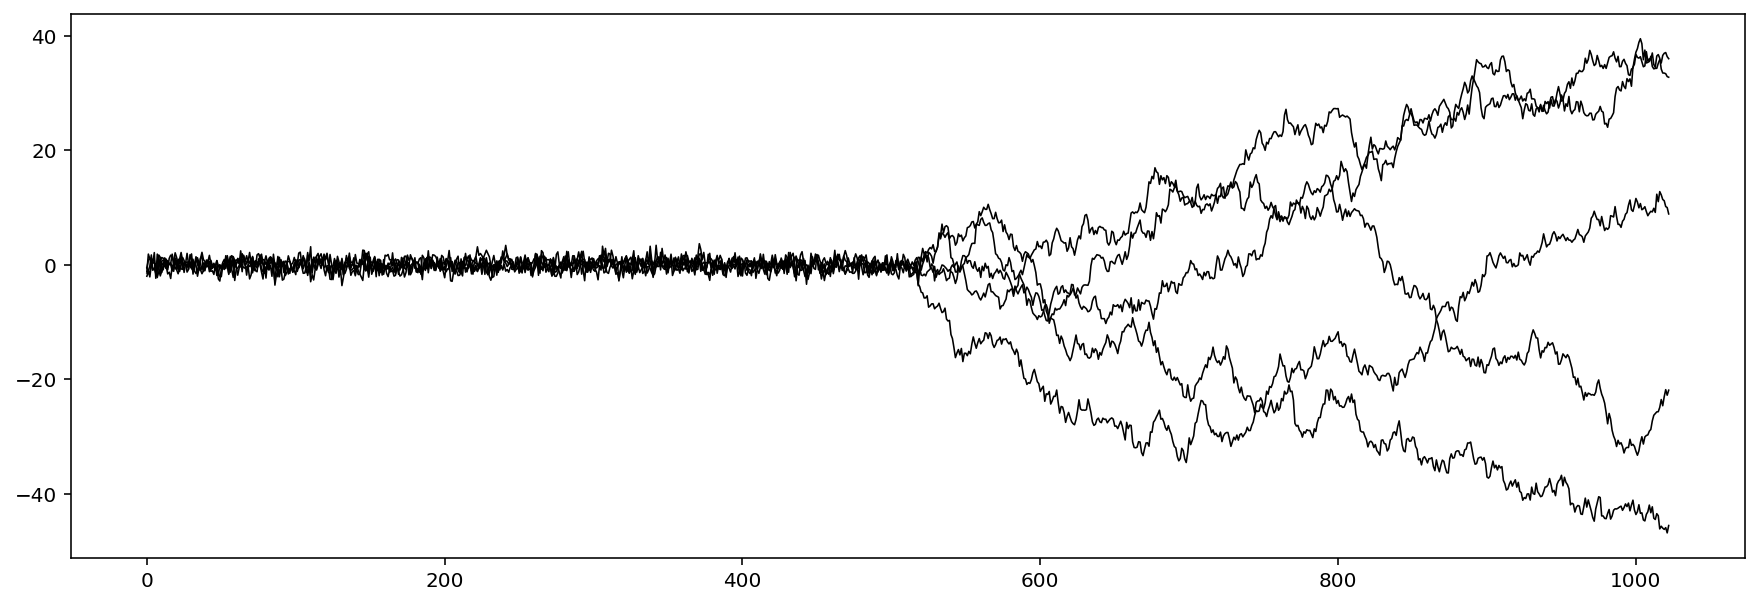

In [ ]:
def draw_trajectory_3(N, alpha):
  x = np.random.randn()
  trajectory = np.zeros(N)
  trajectory[0] = x
  for i in range(1, N):
    alpha_ = alpha if i < N // 2 else 1.00005
    trajectory[i] = alpha_ * trajectory[i-1] + np.random.normal(0, 1)
  return trajectory

plt.figure(figsize=(15, 5))
for _ in range(5):
  plt.plot(draw_trajectory_3(1023, 0.3), color="black", linewidth=0.8)

In [ ]:
from statsmodels.tsa.stattools import adfuller
import pandas as pd
import numpy as np
# %matplotlib inline

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
strange_trajectory = draw_trajectory_3(1023, 0.3)

In [ ]:
# ADF Test
result = adfuller(strange_trajectory[:400], autolag='AIC')
print(f'p-value: {result[1]}')

p-value: 1.2519403083939419e-29


In [ ]:
result = adfuller(strange_trajectory[-400:], autolag='AIC')
print(f'p-value: {result[1]}')

p-value: 0.33622029399021913


## Models (MA, AR, ARMA)

### Autoregressive

In [ ]:
def AR1(N, alpha, beta):
  x = np.random.randn()
  trajectory = np.zeros(N)
  trajectory[0] = x
  for i in range(1, N):
    trajectory[i] = alpha * trajectory[i-1] + np.random.randn() + beta
  return trajectory

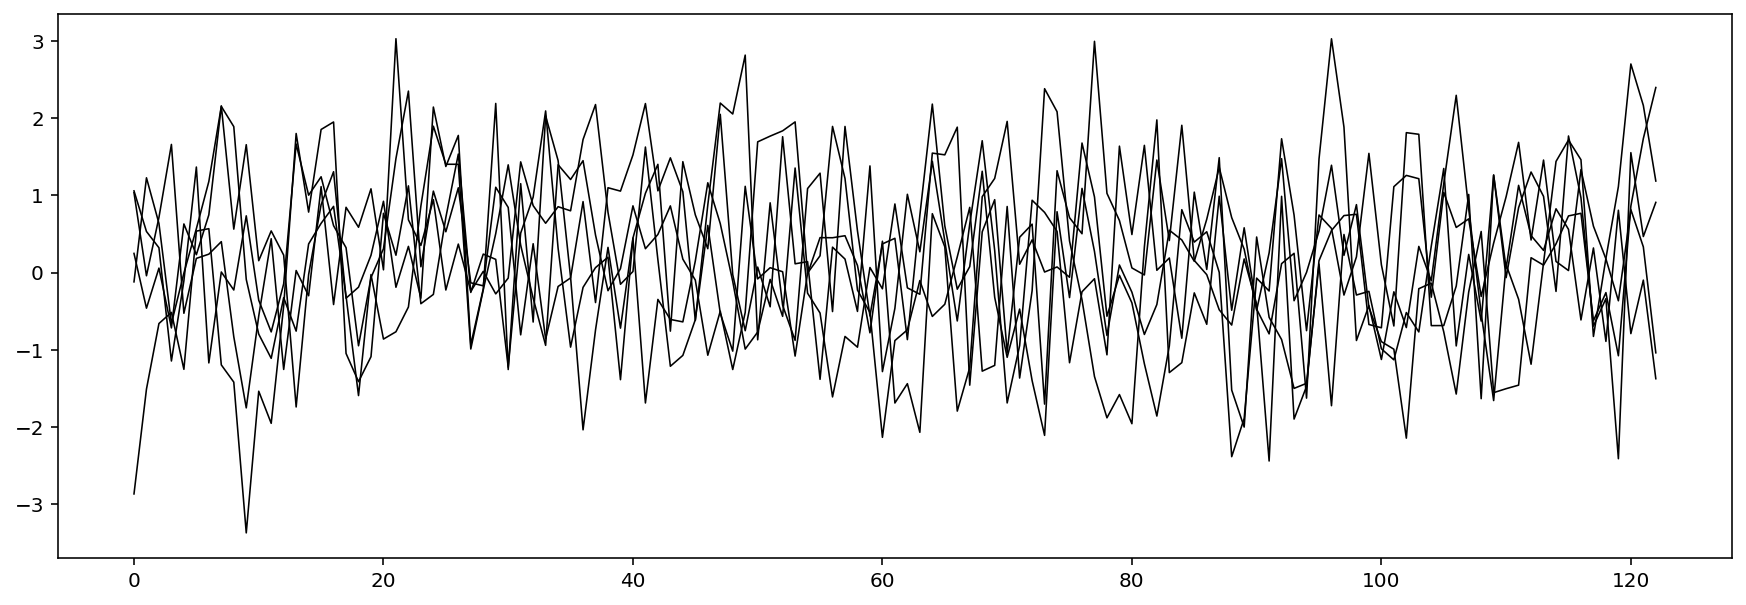

In [ ]:
plt.figure(figsize=(15, 5))
for _ in range(5):
  plt.plot(AR1(123, 0.3, 0.1), color="black", linewidth=0.8)

### Moving average

In [ ]:
def MA1(N, alpha, beta):
  trajectory = np.zeros(N)
  noises = np.random.randn(N)
  trajectory[0] = noises[0]
  for i in range(1, N):
    trajectory[i] = alpha * noises[i-1] + noises[i] + beta
  return trajectory

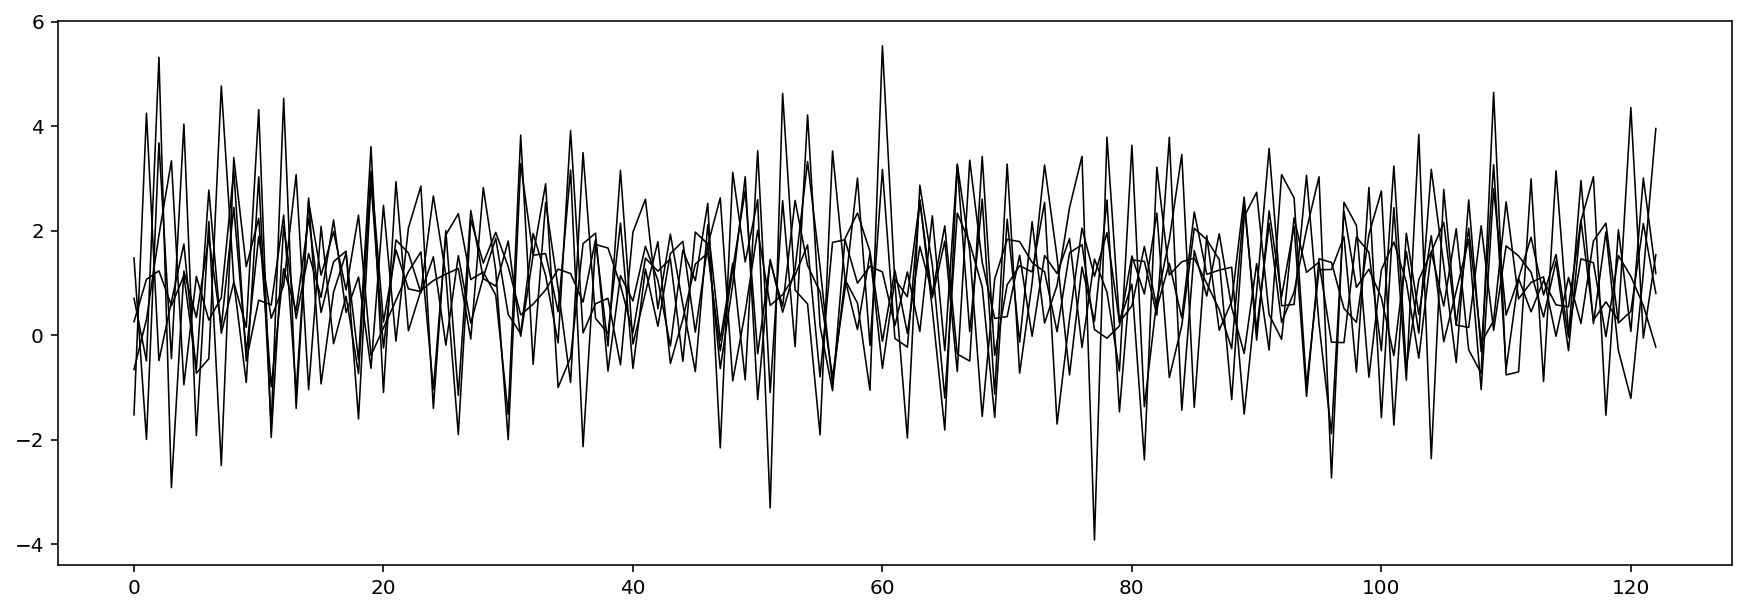

In [ ]:
plt.figure(figsize=(15, 5))
for _ in range(5):
  plt.plot(MA1(123, -1.01, 1), color="black", linewidth=0.8)

### ARMA(p, q) = AR(p) + MA(q)

In [ ]:
def ARMA11(N, alpha, gamma, beta):
  trajectory = np.zeros(N)
  noises = np.random.randn(N)
  trajectory[0] = noises[0]
  for i in range(1, N):
    trajectory[i] = alpha * noises[i-1] + gamma * trajectory[i-1] + noises[i] + beta
  return trajectory

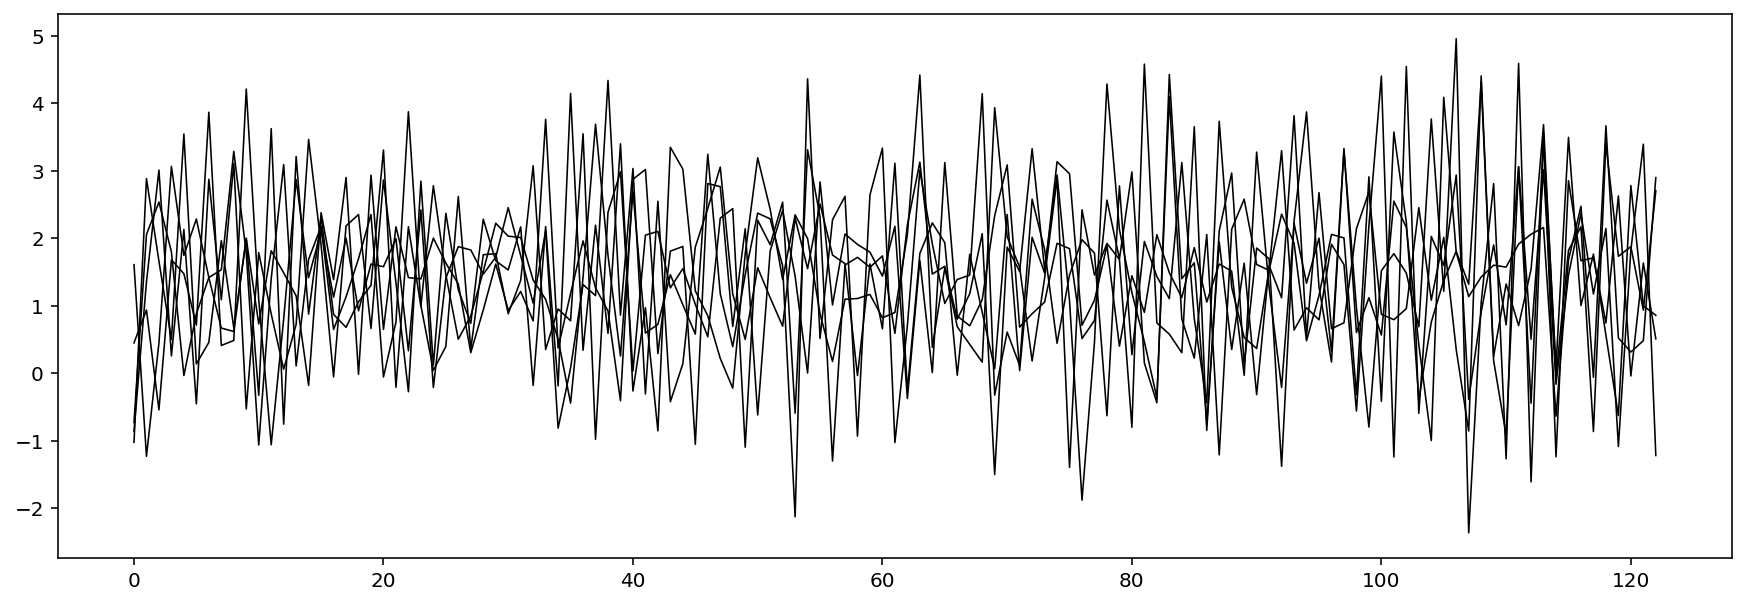

In [ ]:
plt.figure(figsize=(15, 5))
for _ in range(5):
  plt.plot(ARMA11(123, -1.01, 0.3, 1), color="black", linewidth=0.8)

## Yule-Walker (AR)

\begin{equation}
  \begin{split}
    & z_{t} = \alpha z_{t-1} + a_t,\,a_t\sim\mathcal{N}(0, 1)\\
    & z_{t}z_{t-1} = \alpha z_{t-1}^2 + a_tz_{t-1}\\
    & \mathbb{E}\left[z_{t}z_{t-1} = \alpha z_{t-1}^2 + a_tz_{t-1}\right] \\
    & \alpha = \mathbb{E}\left[z_{t} z_{t-1}\right] \big/ \mathbb{E}\left[z_{t-1}^2\right]
  \end{split}
\end{equation}

In [ ]:
trajectory = AR1(100000, 0.3, 0.0)

z2 = np.mean(trajectory**2)
z1_z2 = np.mean(np.roll(trajectory, 1)*trajectory)
estimation = z1_z2 / z2

print("0.3 = ", estimation, "?")

0.3 =  0.2976202014112134 ?


In [ ]:
trajectory = AR1(100000, 0.7, 0.0)

z2 = np.mean(trajectory**2)
z1_z2 = np.mean(np.roll(trajectory, 1)*trajectory)
estimation = z1_z2 / z2

print("0.7 = ", estimation, "?")

0.7 =  0.6984514507518614 ?


In [ ]:
trajectory = AR1(100000, 0.98, 0.0)

z2 = np.mean(trajectory**2)
z1_z2 = np.mean(np.roll(trajectory, 1)*trajectory)
estimation = z1_z2 / z2

print("0.98 = ", estimation, "?")

0.98 =  0.9800986776945004 ?


In [ ]:
trajectory = AR1(100000, 1.003, 0.0)

z2 = np.mean(trajectory**2)
z1_z2 = np.mean(np.roll(trajectory, 1)*trajectory)
estimation = z1_z2 / z2

print("1.003 = ", estimation, "?")

1.003 =  0.9970089730807581 ?


In [ ]:
trajectory = AR1(100000, 1.1, 0.0)

z2 = np.mean(trajectory**2)
z1_z2 = np.mean(np.roll(trajectory, 1)*trajectory)
estimation = z1_z2 / z2

print("1.003 = ", estimation, "?")

1.003 =  nan ?


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: RuntimeWarning: overflow encountered in double_scalars
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: RuntimeWarning: overflow encountered in square
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/numpy/core/_methods.py:179: RuntimeWarning: overflow encountered in reduce
  ret = umr_sum(arr, axis, dtype, out, keepdims, where=where)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: RuntimeWarning: overflow encountered in multiply
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/numpy/core/_methods.py:179: RuntimeWarning: invalid value encountered in reduce
  ret = umr_sum(arr, axis, dtype, out, keepdims, where=where)
